In [1]:
# Data manipulation
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# This magic command displays plots directly in the notebook
%matplotlib inline
# Statistics
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv('Housing.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [3]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [4]:
#change no to 0 and yes to 1

cols_to_change=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df.loc[:, cols_to_change] = df.loc[:, cols_to_change].replace({'no': 0, 'yes': 1})



In [5]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


In [6]:
#change furnished to 3, semi-furnished to 2 and unfurnished to 1
df['furnishingstatus'].replace({'furnished': 3, 'semi-furnished': 2, 'unfurnished': 1}, inplace=True)


In [7]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,3
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,3
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,3
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,3
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,2
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,2
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,3
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,1


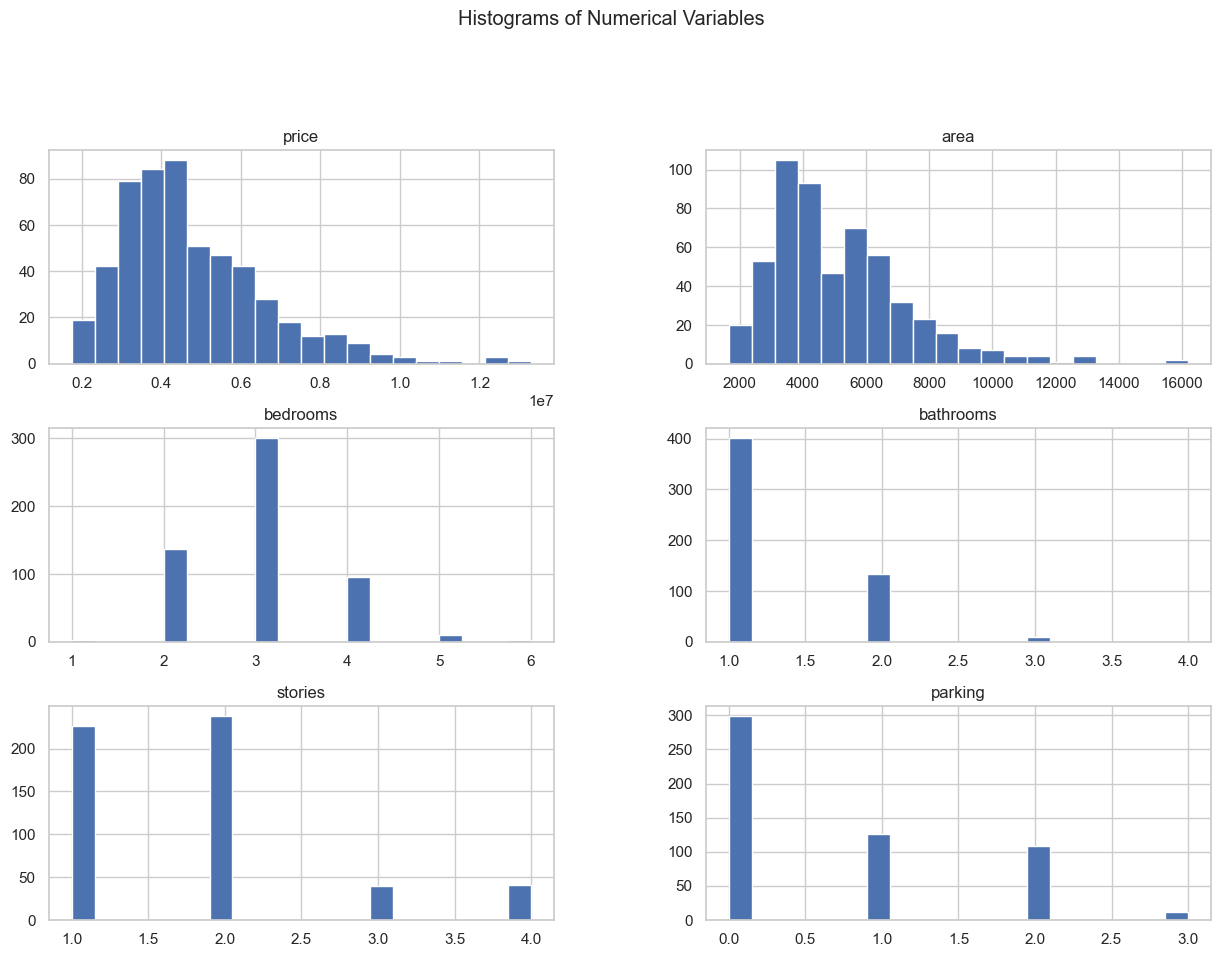

In [8]:
#histogram
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables', y=1.02)
plt.show()

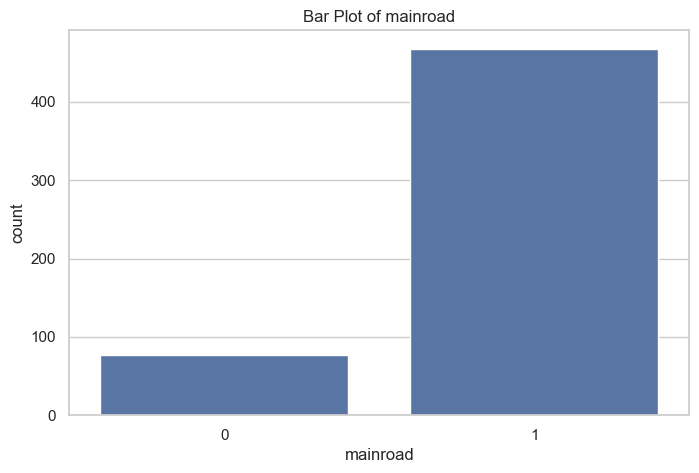

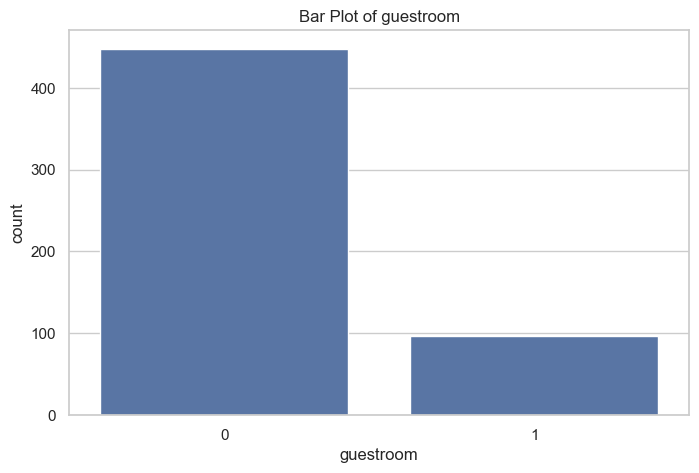

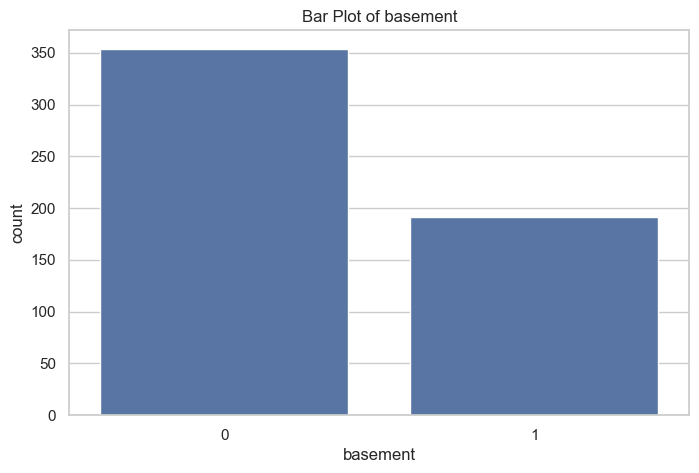

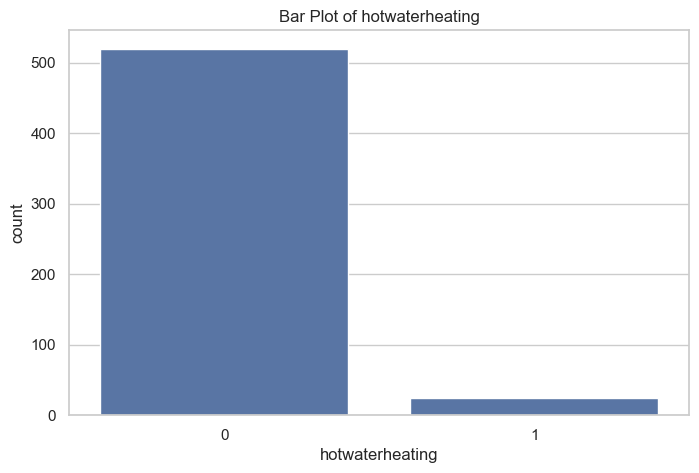

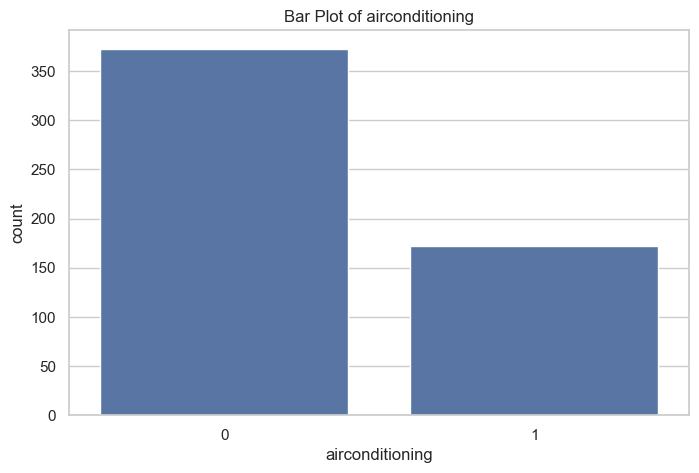

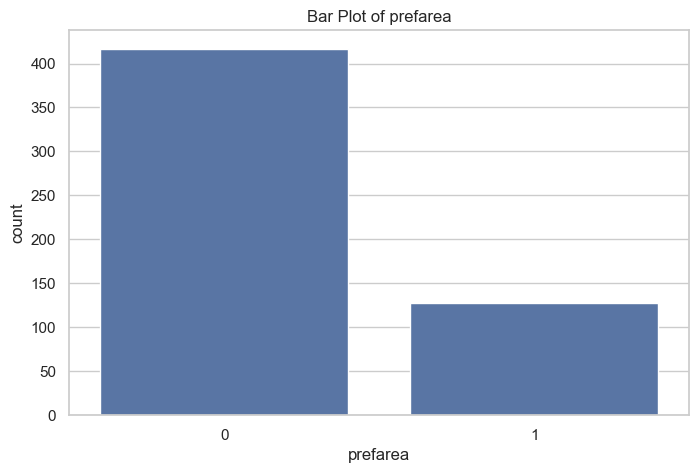

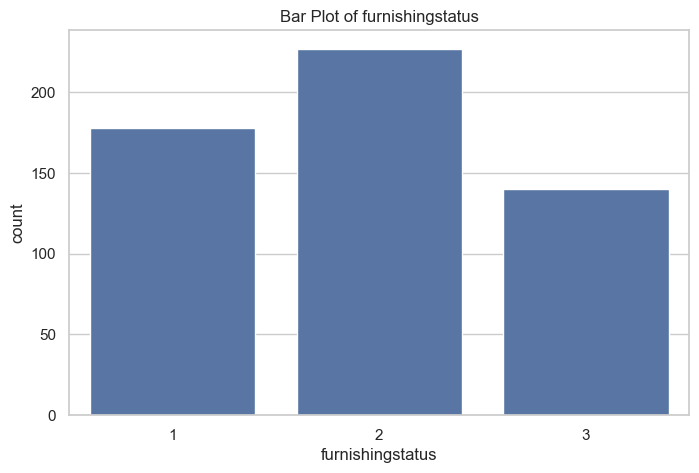

In [9]:
# Bar plots for categorical variables
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts())
    plt.title(f'Bar Plot of {col}')
    plt.show()


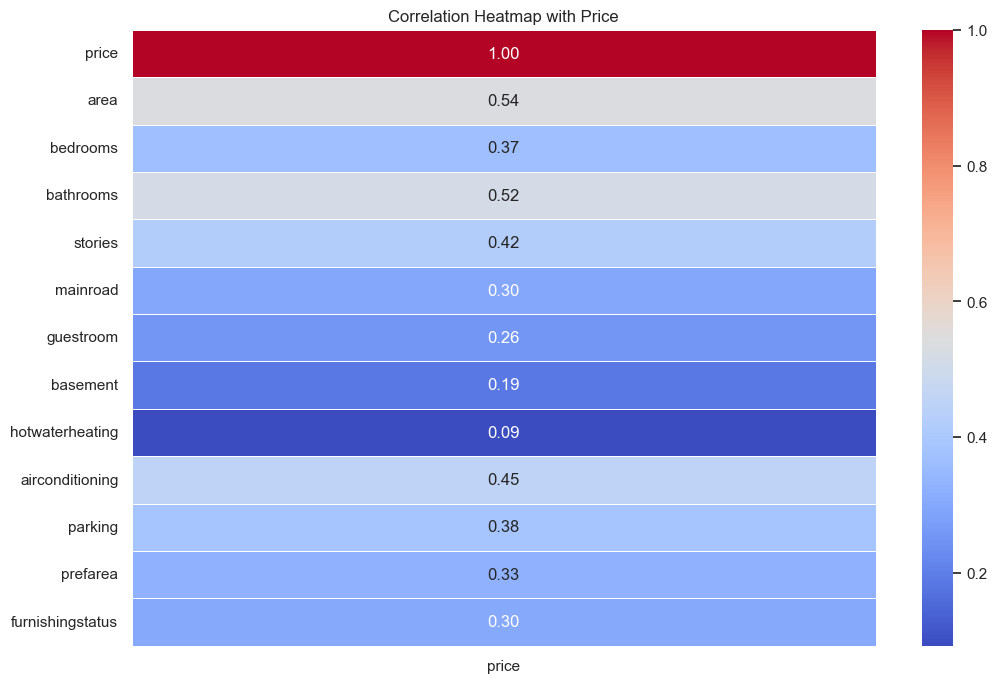

In [10]:


# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['price']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap with Price')
plt.show()


In [11]:
correlation_with_price = df.corr()['price'].sort_values(ascending=False)
print(correlation_with_price)


price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
furnishingstatus    0.304721
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
Name: price, dtype: float64


In [12]:
#seperate feature X and y
#area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
X = df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]
y = df['price']

#test train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) #20% test 





In [13]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [14]:
train_accuracy = model.score(X_train, y_train)

print(f'Training Accuracy (R-squared): {train_accuracy}')

Training Accuracy (R-squared): 0.6775700791677715


In [15]:
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [16]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

# Create a DataFrame for actual vs. predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the DataFrame
print(results_df.head(10))  # Displaying the first 10 rows for illustration

# Display regression metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

      Actual     Predicted
316  4060000  5.130953e+06
77   6650000  7.264655e+06
360  3710000  3.032821e+06
90   6440000  4.624349e+06
493  2800000  3.363592e+06
209  4900000  3.539584e+06
176  5250000  5.711441e+06
249  4543000  6.536603e+06
516  2450000  2.816954e+06
426  3353000  2.634102e+06
Mean Squared Error: 1481693327820.205
Mean Absolute Error: 884725.7114448026
R-squared: 0.6811028422155205


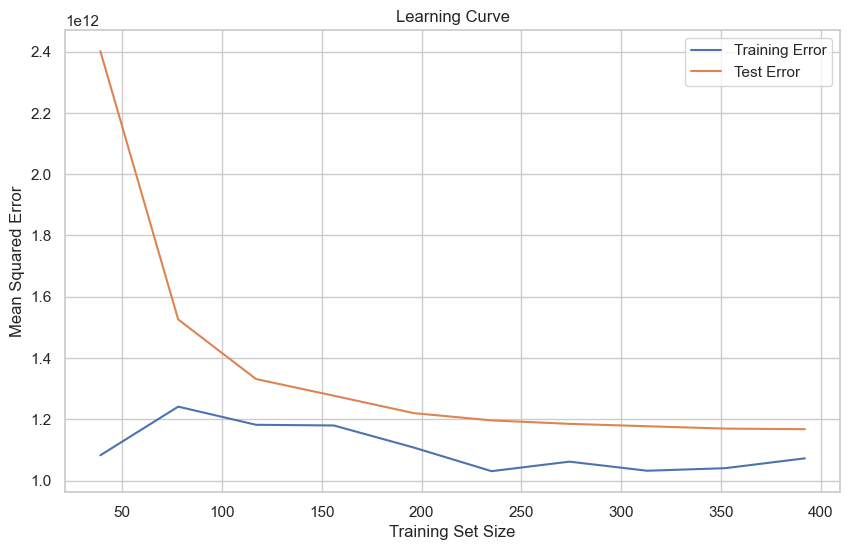

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, scoring='neg_mean_squared_error', cv=5, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Error')
    plt.plot(train_sizes, test_scores_mean, label='Test Error')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

# Assuming 'model', 'X_train_scaled', 'y_train', 'X_test_scaled', 'y_test' are already defined
plot_learning_curve(model, X_train, y_train)

In [18]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,5900,4,2,2,0,0,1,0,0,1,0,1
77,6500,3,2,3,1,0,0,0,1,0,1,3
360,4040,2,1,1,1,0,0,0,0,0,0,2
90,5000,3,1,2,1,0,0,0,1,0,0,2
493,3960,3,1,1,1,0,0,0,0,0,0,3
209,6720,3,1,1,1,0,0,0,0,0,0,1
176,8520,3,1,1,1,0,0,0,1,2,0,3
249,4990,4,2,2,1,1,1,0,0,0,1,3
516,3240,2,1,1,0,1,0,0,0,1,0,1
426,2700,3,1,1,0,0,0,0,0,0,0,3


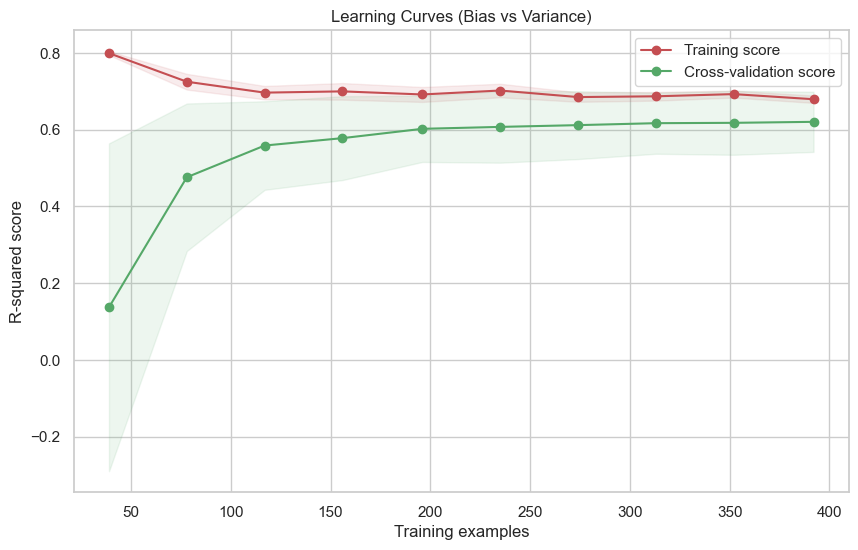

In [19]:

from sklearn.model_selection import learning_curve


# Assuming X_train, y_train are your training data
train_sizes, train_scores, test_scores = learning_curve(
    LinearRegression(), X_train, y_train, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training scores and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# Add labels and legend
plt.xlabel("Training examples")
plt.ylabel("R-squared score")
plt.legend(loc="best")
plt.title("Learning Curves (Bias vs Variance)")

plt.show()
